In [1]:
import pandas as pd
customers = pd.read_csv('Wholesale customers data.csv')
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [2]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [3]:
customers.describe(include = 'all').round(2)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.00,440.00,440.00,440.00,440.00,440.00,440.00,440.00
mean,1.32,2.54,12000.30,5796.27,7951.28,3071.93,2881.49,1524.87
std,0.47,0.77,12647.33,7380.38,9503.16,4854.67,4767.85,2820.11
min,1.00,1.00,3.00,55.00,3.00,25.00,3.00,3.00
25%,1.00,2.00,3127.75,1533.00,2153.00,742.25,256.75,408.25
50%,1.00,3.00,8504.00,3627.00,4755.50,1526.00,816.50,965.50
75%,2.00,3.00,16933.75,7190.25,10655.75,3554.25,3922.00,1820.25
max,2.00,3.00,112151.00,73498.00,92780.00,60869.00,40827.00,47943.00


In [4]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()

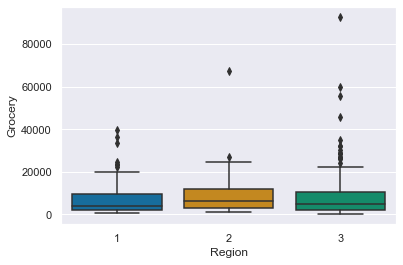

In [8]:
ax = sns.boxplot(data= customers,
                x='Region',
                y='Grocery',
                palette='colorblind')

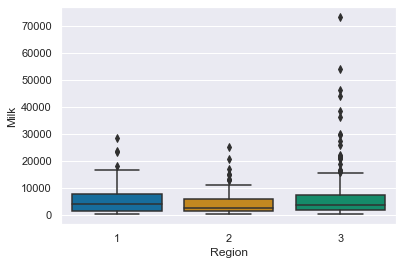

In [9]:
ax = sns.boxplot(data= customers,
                x='Region',
                y='Milk',
                palette='colorblind')

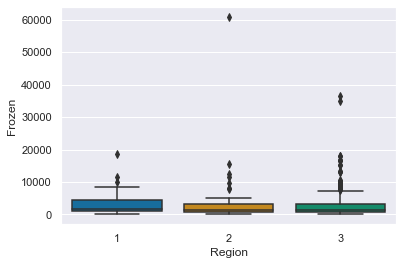

In [10]:
ax = sns.boxplot(data= customers,
                x='Region',
                y='Frozen',
                palette='colorblind')

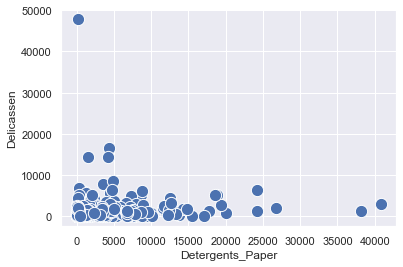

In [11]:
ax = sns.scatterplot(data= customers,
                x='Detergents_Paper',
                y='Delicassen',
                s=150)

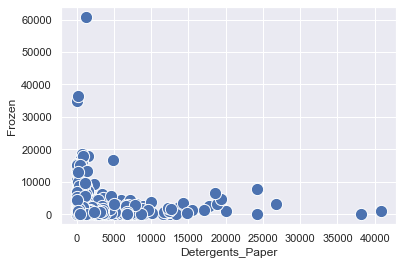

In [12]:
ax = sns.scatterplot(data= customers,
                x='Detergents_Paper',
                y='Frozen',
                s=150)

In [13]:
customers[['Region','Milk']].describe().round(2)

,Region,Milk
count,440.00,440.00
mean,2.54,5796.27
std,0.77,7380.38
min,1.00,55.00
25%,2.00,1533.00
50%,3.00,3627.00
75%,3.00,7190.25
max,3.00,73498.00


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
customers_scaled = scaler.fit_transform(customers[['Region','Milk']])

In [15]:
customers_scaled

array([[ 5.90668285e-01,  5.23567773e-01],
       [ 5.90668285e-01,  5.44457667e-01],
       [ 5.90668285e-01,  4.08537706e-01],
       [ 5.90668285e-01, -6.24019925e-01],
       [ 5.90668285e-01, -5.23964546e-02],
       [ 5.90668285e-01,  3.34066589e-01],
       [ 5.90668285e-01, -3.52315651e-01],
       [ 5.90668285e-01, -1.13980948e-01],
       [ 5.90668285e-01, -2.91409401e-01],
       [ 5.90668285e-01,  7.18494904e-01],
       [ 5.90668285e-01, -5.33459952e-02],
       [ 5.90668285e-01, -6.33786629e-01],
       [ 5.90668285e-01,  8.84800166e-01],
       [ 5.90668285e-01,  5.58511794e-02],
       [ 5.90668285e-01,  4.97658878e-01],
       [ 5.90668285e-01, -6.35143116e-01],
       [ 5.90668285e-01,  4.09622895e-01],
       [ 5.90668285e-01,  4.89330975e-02],
       [ 5.90668285e-01,  7.19933704e-02],
       [ 5.90668285e-01, -4.47812310e-01],
       [ 5.90668285e-01, -1.73259414e-01],
       [ 5.90668285e-01, -6.68105741e-01],
       [ 5.90668285e-01, -5.26217238e-01],
       [ 5.

In [16]:
customers_scaled = pd.DataFrame(customers_scaled,columns=('Region','Milk'))

In [18]:
customers_scaled

,Region,Milk
0,0.590668,0.523568
1,0.590668,0.544458
2,0.590668,0.408538
3,0.590668,-0.624020
4,0.590668,-0.052396
...,...,...
435,0.590668,0.848446
436,0.590668,-0.592142
437,0.590668,1.314671
438,0.590668,-0.517536


In [20]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,n_init=25,random_state=1234)

In [21]:
km.fit(customers_scaled)

KMeans(n_clusters=3, n_init=25, random_state=1234)

In [22]:
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [24]:
km.inertia_  

246.66771002149034

In [25]:
km.cluster_centers_ 

array([[-1.50639057, -0.16969721],
       [ 0.59066829, -0.17231485],
       [ 0.09809488,  3.42325821]])

In [26]:
pd.Series(km.labels_).value_counts().sort_index()

0    119
1    300
2     21
dtype: int64

In [27]:
km.cluster_centers_

array([[-1.50639057, -0.16969721],
       [ 0.59066829, -0.17231485],
       [ 0.09809488,  3.42325821]])

In [28]:
cluster_centers = pd.DataFrame(km.cluster_centers_,
                              columns = ['Region','Milk'])
cluster_centers

,Region,Milk
0,-1.506391,-0.169697
1,0.590668,-0.172315
2,0.098095,3.423258


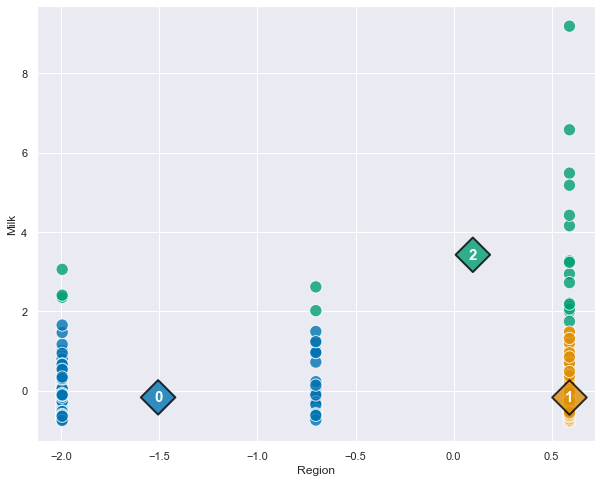

In [29]:
plt.figure(figsize=(10,8))
ax = sns.scatterplot(data = customers_scaled,
                    x='Region',
                    y='Milk',
                    hue= km.labels_,
                    palette='colorblind',
                    alpha = 0.8,
                    s = 150,
                    legend =False)

ax = sns.scatterplot(data = cluster_centers,
                   x='Region',
                    y='Milk',
                    hue= cluster_centers.index,
                    palette='colorblind',
                    alpha = 0.8,
                    s = 600,
                    marker='D',
                    ec = 'black',
                    legend = False )


for i in range(len(cluster_centers)):
    plt.text(x = cluster_centers.Region[i],
            y= cluster_centers.Milk[i],
            s=i,
            horizontalalignment='center',
            verticalalignment='center',
            size=15,
            weight='bold',
            color='white')

In [30]:
km.inertia_

246.66771002149034

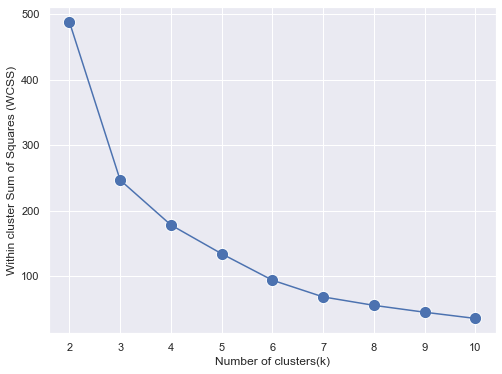

In [31]:
wcss = []
for k in range(2,11):
    km = KMeans(n_clusters = k, n_init =25, random_state=1234)
    km.fit(customers_scaled)
    wcss.append(km.inertia_)

wcss_series = pd.Series(wcss, index = range(2,11))

plt.figure(figsize=(8,6))
ax = sns.lineplot(y = wcss_series, x= wcss_series.index)
ax = sns.scatterplot(y = wcss_series, x =wcss_series.index ,s=150)
ax = ax.set(xlabel = 'Number of clusters(k)',
           ylabel= 'Within cluster Sum of Squares (WCSS)')

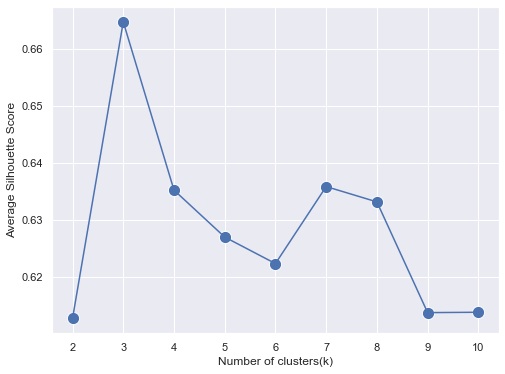

In [32]:
from sklearn.metrics import silhouette_score

silhouette =[]
for k in range(2,11):
    km = KMeans(n_clusters = k, n_init =25, random_state=1234)
    km.fit(customers_scaled)
    silhouette.append(silhouette_score(customers_scaled,km.labels_))
    
silhouette_series = pd.Series(silhouette, index = range(2,11))

plt.figure(figsize=(8,6))
ax = sns.lineplot(y = silhouette_series, x= silhouette_series.index)
ax = sns.scatterplot(y = silhouette_series, x =silhouette_series.index ,s=150)
ax = ax.set(xlabel = 'Number of clusters(k)',
           ylabel= 'Average Silhouette Score')


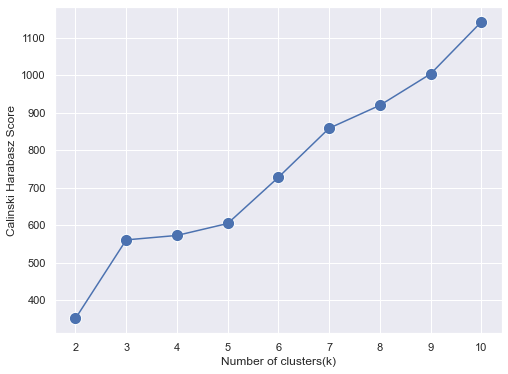

In [33]:
from sklearn.metrics import calinski_harabasz_score

calinski =[]
for k in range(2,11):
    km = KMeans(n_clusters = k, n_init =25, random_state=1234)
    km.fit(customers_scaled)
    calinski.append(calinski_harabasz_score(customers_scaled,km.labels_))
    
calinski_series = pd.Series(calinski, index = range(2,11))

plt.figure(figsize=(8,6))
ax = sns.lineplot(y = calinski_series, x= calinski_series.index)
ax = sns.scatterplot(y = calinski_series, x =calinski_series.index ,s=150)
ax = ax.set(xlabel = 'Number of clusters(k)',
           ylabel= 'Calinski Harabasz Score')


In [34]:
km = KMeans(n_clusters = 5, n_init = 25, random_state = 1234)
km.fit(customers_scaled)

KMeans(n_clusters=5, n_init=25, random_state=1234)

In [35]:
km.labels_

array([2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 4, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2,
       1, 2, 2, 4, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 4, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 4, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [36]:
pd.Series(km.labels_).value_counts().sort_index()

0     39
1    267
2     52
3     76
4      6
dtype: int64

In [37]:
km.cluster_centers_

array([[-0.70233692, -0.41183411],
       [ 0.59066829, -0.3000015 ],
       [ 0.34201344,  1.29746427],
       [-1.99534212, -0.08279603],
       [ 0.59066829,  5.83104784]])

In [39]:
cluster_center = pd.DataFrame(km.cluster_centers_, columns = ['Region','Milk'])
cluster_center

,Region,Milk
0,-0.702337,-0.411834
1,0.590668,-0.300001
2,0.342013,1.297464
3,-1.995342,-0.082796
4,0.590668,5.831048


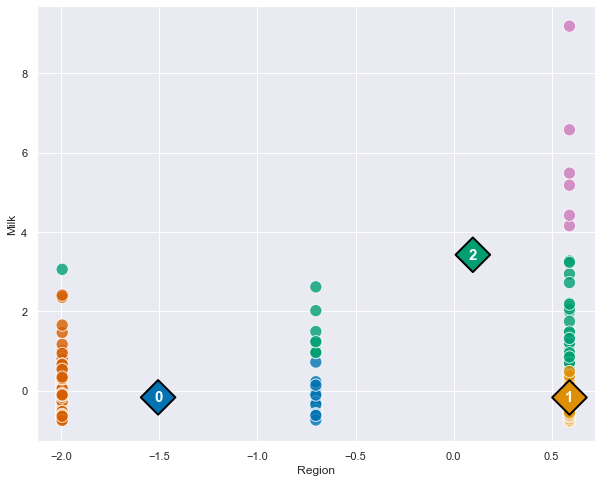

In [62]:
plt.figure(figsize=(10,8))
ax = sns.scatterplot(data = customers_scaled,
                    x='Region',
                    y='Milk',
                    hue= km.labels_,
                    palette='colorblind',
                    alpha = 0.8,
                    s = 150,
                    legend =False)

ax = sns.scatterplot(data = cluster_centers,
                   x='Region',
                    y='Milk',
                    hue= cluster_centers.index,
                    palette='colorblind',
                    s = 600,
                    marker='D',
                    ec = 'black',
                    legend = False )


for i in range(len(cluster_centers)):
    plt.text(x = cluster_centers.Region[i],
            y= cluster_centers.Milk[i],
            s=i,
            horizontalalignment='center',
            verticalalignment='center',
            size=15,
            weight='bold',
            color='white')

In [41]:
customers['Cluster']=km.labels_.tolist()
customers.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,2
1,2,3,7057,9810,9568,1762,3293,1776,2
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,1
5,2,3,9413,8259,5126,666,1795,1451,1
6,2,3,12126,3199,6975,480,3140,545,1
7,2,3,7579,4956,9426,1669,3321,2566,1
8,1,3,5963,3648,6192,425,1716,750,1
9,2,3,6006,11093,18881,1159,7425,2098,2


In [59]:
customers.agg({
    'Channel': 'median',
    'Grocery': 'median',
    'Frozen': 'median',
    'Detergents_Paper': 'median',
    'Delicassen': 'median',
}).round(2)

Channel                1.0
Grocery             4755.5
Frozen              1526.0
Detergents_Paper     816.5
Delicassen           965.5
dtype: float64

In [60]:
customers.groupby('Cluster').agg({
    'Channel': 'median',
    'Grocery': 'median',
    'Frozen': 'median',
    'Detergents_Paper': 'median',
    'Delicassen': 'median',
}).round(2)

,Channel,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster,,,,,
0,1.0,5109.0,1455.0,492.0,868.0
1,1.0,3580.0,1456.0,621.0,860.0
2,2.0,17139.0,1630.5,6901.0,1451.0
3,1.0,3835.5,1789.0,733.5,801.5
4,2.0,43842.5,4204.0,22120.5,4704.5
